### Note: This file contains messy and rushed code (done at FSAE competition), <br> but it provides meaningful visuals, so I've chosen to publish it

In [8]:
import matplotlib.pyplot as plt
import math

### A Collection of Utility Functions

In [9]:
def max_min_ARB_K():
    lst = [17600.547584722637, 17662.273689140995, 17846.679998507025, 18151.474379362433, 18572.914834228002, 19105.922172260827, 19744.22884809254, 20480.556022450215, 21306.809852135302, 22214.287673776653, 23193.88506833398, 24236.295680918043, 25332.196979196236, 26472.416699564634, 27648.076391525927, 28850.710085137896, 30072.357563038877, 31305.632942812586, 32543.77022859172, 33780.64816534894, 35010.797142092226, 36229.39107442758, 37432.22719497941, 38615.69653708749, 39776.74765629965, 40912.84583380177, 42021.929677850334, 43102.3667081864, 44152.90919218376, 45172.65121195826, 46160.98768566568, 47117.57584666284, 48042.29950113697, 48935.23623629558, 49796.62763409557, 50626.85245598215, 51426.40269818815, 52195.86237087952, 52935.888824162415, 53647.19642640175, 54330.54239258994, 54986.71456022015, 55616.52091525608, 56220.780679716605, 56800.316783812515, 57355.949558470704, 57888.49149768771, 58398.74295389463, 58887.48864297501, 59355.49484847037, 59803.50722664438, 60232.24912534745, 60642.420339971584, 61034.696239199555, 61409.727201750524, 61768.13831294233, 62110.52927668251, 62437.47450452233, 62749.52334872553, 63047.200450977936, 63331.006182459845, 63601.41715457839, 63858.8867827677, 64103.845888466465, 64336.70332671566, 64557.84662883703, 64767.642651385184, 64966.43822405436, 65154.56079049381, 65332.319037070665, 65500.00350554247, 65657.88718638256, 65806.22609016238, 65945.25979494734, 66075.2119681277, 66196.29086148978, 66308.68977865129, 66412.58751424367, 66508.14876443606, 66595.52450856232, 66674.85236174581, 66746.25689851769, 66809.84994749932, 66865.73085727388, 66913.98673360521, 66954.69264818265, 66987.91181907487, 67013.69576307184, 67032.08442008012, 67043.10624971513, 67046.77830020816]

    track_F = 50 * 0.0254

    x = [x for x in range(0, 91)]

    adj_stiff = [x * 0.27**2 for x in lst]

    y = [x * (track_F / 2)**2 * math.pi / 180 for x in adj_stiff]

    print("(min, max):", (y[0], y[-1]), "Nm/deg")

def roll_K_vs_lat_accel():
    lat_accels = [x for x in range(0, 14)]
    heave_L = [0.315474749, 0.355638359, 0.395802193, 0.435966477, 0.476131434, 0.51629729, 0.55646427, 0.596632598, 0.636802499, 0.676974198, 0.717147919, 0.757323888, 0.797502329, 0.837683467]
    heave_R = [0.315474749, 0.275311139, 0.235147305, 0.194983022, 0.154818064, 0.114652208, 0.074485228, 0.0343169, -0.005853001, -0.0460247, -0.086198421, -0.12637439, -0.166552831, -0.20673397]

    MR_L = [MR(x) for x in heave_L]
    MR_R = [MR(x) for x in heave_R]

    return (MR_L, MR_R)

def single_side_ride_rate(MR):
    K_s = 550
    tire_K = 100000 / 2
    wheel_K = K_s / MR**2 * 175 / 2

    return 1 / (1/tire_K + 1/wheel_K)

def ride_rates():
    MRs = roll_K_vs_lat_accel()
    ride_L = [single_side_ride_rate(MR) for MR in MRs[0]]
    ride_R = [single_side_ride_rate(MR) for MR in MRs[1]]

    ride_tup = zip(ride_L, ride_R)

    rides = [x + y for (x, y) in ride_tup]

    return rides

def MR(heave):
    return 1.980261929 - 0.499003767 * heave + -0.2253784668 * heave**2

### Roll Stiffness as a Function of ARB Blade Rotation

In [10]:
def roll_vs_blade():
    lst = [17600.547584722637, 17662.273689140995, 17846.679998507025, 18151.474379362433, 18572.914834228002, 19105.922172260827, 19744.22884809254, 20480.556022450215, 21306.809852135302, 22214.287673776653, 23193.88506833398, 24236.295680918043, 25332.196979196236, 26472.416699564634, 27648.076391525927, 28850.710085137896, 30072.357563038877, 31305.632942812586, 32543.77022859172, 33780.64816534894, 35010.797142092226, 36229.39107442758, 37432.22719497941, 38615.69653708749, 39776.74765629965, 40912.84583380177, 42021.929677850334, 43102.3667081864, 44152.90919218376, 45172.65121195826, 46160.98768566568, 47117.57584666284, 48042.29950113697, 48935.23623629558, 49796.62763409557, 50626.85245598215, 51426.40269818815, 52195.86237087952, 52935.888824162415, 53647.19642640175, 54330.54239258994, 54986.71456022015, 55616.52091525608, 56220.780679716605, 56800.316783812515, 57355.949558470704, 57888.49149768771, 58398.74295389463, 58887.48864297501, 59355.49484847037, 59803.50722664438, 60232.24912534745, 60642.420339971584, 61034.696239199555, 61409.727201750524, 61768.13831294233, 62110.52927668251, 62437.47450452233, 62749.52334872553, 63047.200450977936, 63331.006182459845, 63601.41715457839, 63858.8867827677, 64103.845888466465, 64336.70332671566, 64557.84662883703, 64767.642651385184, 64966.43822405436, 65154.56079049381, 65332.319037070665, 65500.00350554247, 65657.88718638256, 65806.22609016238, 65945.25979494734, 66075.2119681277, 66196.29086148978, 66308.68977865129, 66412.58751424367, 66508.14876443606, 66595.52450856232, 66674.85236174581, 66746.25689851769, 66809.84994749932, 66865.73085727388, 66913.98673360521, 66954.69264818265, 66987.91181907487, 67013.69576307184, 67032.08442008012, 67043.10624971513, 67046.77830020816]

    track_F = 50 * 0.0254

    x = [x for x in range(0, 91)]

    adj_stiff = [x * 0.27**2 + 26000 for x in lst]

    y = [x * (track_F / 2)**2 * math.pi / 180 - 16 for x in adj_stiff]

    plt.plot(x, y)

    plt.grid()

    plt.xlabel("Angle of Blade Rotation (degrees)")
    # naming the y axis
    plt.ylabel('Front Roll Stiffness (Nm/deg)')

    # giving a title to my graph
    plt.title('Front Roll Stiffness vs Angle of Blade Rotation')

    # function to show the plot
    plt.show()

### Roll Stiffness Distribution as a Function of ARB Blade Rotation

In [11]:
def roll_distr_vs_blade():
    lst = [17600.547584722637, 17662.273689140995, 17846.679998507025, 18151.474379362433, 18572.914834228002, 19105.922172260827, 19744.22884809254, 20480.556022450215, 21306.809852135302, 22214.287673776653, 23193.88506833398, 24236.295680918043, 25332.196979196236, 26472.416699564634, 27648.076391525927, 28850.710085137896, 30072.357563038877, 31305.632942812586, 32543.77022859172, 33780.64816534894, 35010.797142092226, 36229.39107442758, 37432.22719497941, 38615.69653708749, 39776.74765629965, 40912.84583380177, 42021.929677850334, 43102.3667081864, 44152.90919218376, 45172.65121195826, 46160.98768566568, 47117.57584666284, 48042.29950113697, 48935.23623629558, 49796.62763409557, 50626.85245598215, 51426.40269818815, 52195.86237087952, 52935.888824162415, 53647.19642640175, 54330.54239258994, 54986.71456022015, 55616.52091525608, 56220.780679716605, 56800.316783812515, 57355.949558470704, 57888.49149768771, 58398.74295389463, 58887.48864297501, 59355.49484847037, 59803.50722664438, 60232.24912534745, 60642.420339971584, 61034.696239199555, 61409.727201750524, 61768.13831294233, 62110.52927668251, 62437.47450452233, 62749.52334872553, 63047.200450977936, 63331.006182459845, 63601.41715457839, 63858.8867827677, 64103.845888466465, 64336.70332671566, 64557.84662883703, 64767.642651385184, 64966.43822405436, 65154.56079049381, 65332.319037070665, 65500.00350554247, 65657.88718638256, 65806.22609016238, 65945.25979494734, 66075.2119681277, 66196.29086148978, 66308.68977865129, 66412.58751424367, 66508.14876443606, 66595.52450856232, 66674.85236174581, 66746.25689851769, 66809.84994749932, 66865.73085727388, 66913.98673360521, 66954.69264818265, 66987.91181907487, 67013.69576307184, 67032.08442008012, 67043.10624971513, 67046.77830020816]

    track_F = 50 * 0.0254

    x = [x for x in range(0, 91)]

    adj_stiff = [x * 0.27**2 + 26000 for x in lst]

    y = [(x * (track_F / 2)**2 * math.pi / 180 - 16) / (227 + (x * (track_F / 2)**2 * math.pi / 180 - 16)) for x in adj_stiff]

    plt.plot(x, y)

    plt.grid()

    plt.xlabel("Angle of Blade Rotation (degrees)")
    # naming the y axis
    plt.ylabel('Roll Distribution, Front to Rear')

    # giving a title to my graph
    plt.title('Roll Stiffness Distribution vs Angle of Blade Rotation')

    # function to show the plot
    plt.show()

### Roll Stiffness as a Function of Lateral Acceleration

In [12]:
def roll_vs_accel():
    track_F = 50 * 0.0254

    rides = ride_rates()

    adj_stiff = [1300 + ride_rate for ride_rate in rides]

    adj_stiff_2 = [5800 + ride_rate for ride_rate in rides]

    y_2 = [x * (track_F / 2)**2 * math.pi / 180 for x in adj_stiff_2]

    y_adj_2 = [(x - 201.9442337239801) / 2 + 201.9442337239801 + 5 for x in y_2]

    y = [x * (track_F / 2)**2 * math.pi / 180 for x in adj_stiff] 

    y_adj = [(x - 170.27501628038652) / 2 + 170.27501628038652 + 5 for x in y]

    x = [x / 10 for x in range(0,14)]

    plt.plot(x, y_adj, 'r', label="Softest ARB Configuration")

    plt.plot(x, y_adj_2, 'b', label="Stiffest ARB Configuration")

    plt.grid()

    plt.legend(loc="upper left")

    plt.xlabel("Lateral Accel (Gs)")
    # naming the y axis
    plt.ylabel('Front Roll Stiffness (Nm/deg)')

    # giving a title to my graph
    plt.title('Roll Stiffness vs Lateral Acceleration')

    # function to show the plot

    plt.show()

### Roll Stiffness Distribution as a Function of Lateral Acceleration

In [13]:
def roll_distr_vs_accel():
    track_F = 50 * 0.0254

    rides = ride_rates()

    adj_stiff = [1300 + ride_rate for ride_rate in rides]

    adj_stiff_2 = [5800 + ride_rate for ride_rate in rides]

    y_2_int = [x * (track_F / 2)**2 * math.pi / 180 for x in adj_stiff_2]

    y_2_adj = [((x - 201.9442337239801) / 2 + 201.9442337239801) / (227 + ((x - 201.9442337239801) / 2 + 201.9442337239801)) for x in y_2_int]

    y_int = [x * (track_F / 2)**2 * math.pi / 180 for x in adj_stiff]

    y_adj = [((x - 170.27501628038652) / 2 + 170.27501628038652) / (227 + ((x - 170.27501628038652) / 2 + 170.27501628038652)) for x in y_2_int]

    x = [x / 10 for x in range(0,14)]

    plt.plot(x, y_adj, 'r', label="Softest ARB Configuration")

    plt.plot(x, y_2_adj, 'b', label="Stiffest ARB Configuration")

    plt.grid()

    plt.legend(loc="upper left")

    plt.xlabel("Lateral Accel (Gs)")
    # naming the y axis
    plt.ylabel('Roll Stiffness Distribution')

    # giving a title to my graph
    plt.title('Roll Stiffness Distribution vs Lateral Acceleration')

    # function to show the plot

    plt.show()

### Graphs

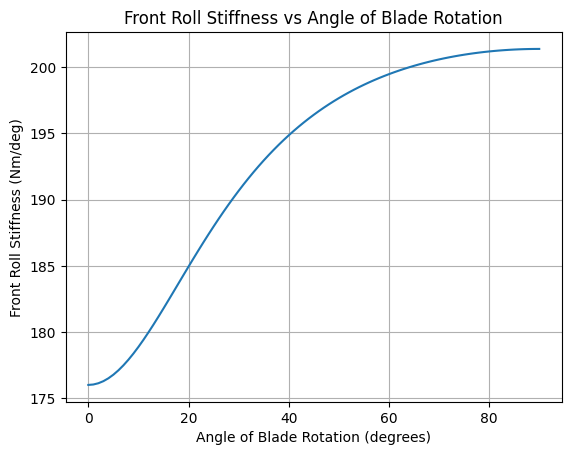

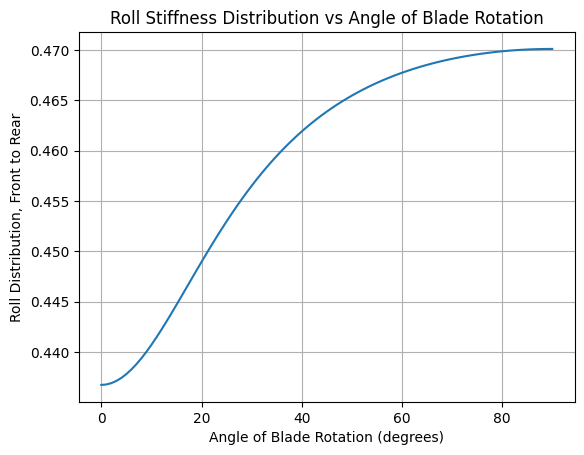

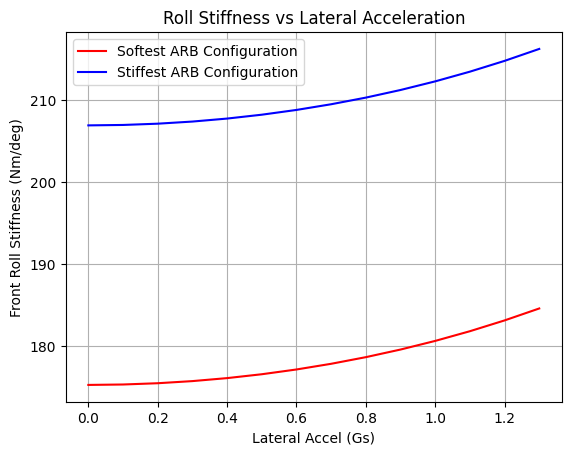

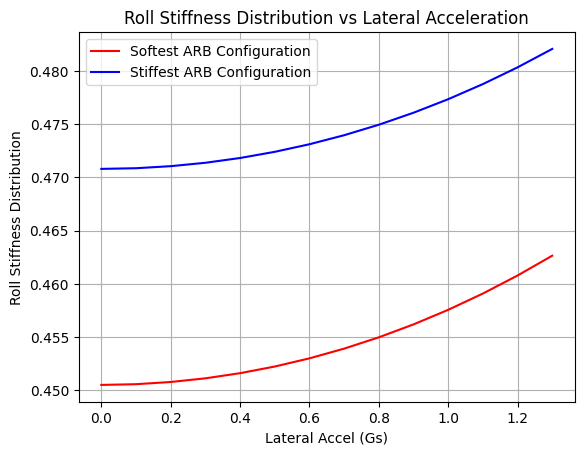

In [14]:
roll_vs_blade()
roll_distr_vs_blade()
roll_vs_accel()
roll_distr_vs_accel()